# Project 2 - Kaggle Challenges with House Prices (Regression)

## Problem Statment



## Executive Summary


In [1]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# pip install pandas-profiling

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# desc = ('data_description.txt', sep='|', )

In [5]:
house_train = pd.read_csv('train.csv', sep=',')


In [6]:
house_train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [7]:
house_train.shape

(1460, 81)

Working in the first 20 columns

In [8]:
saad_col = house_train.iloc[:,0:20]

In [9]:
saad_col['SalePrice'] = house_train.SalePrice

In [10]:
saad_col.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,250000


In [11]:
saad_col.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,147500


In [12]:
# saad_col.YearBuilt.value_counts()

In [13]:
saad_col.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
SalePrice          0
dtype: int64

In [14]:
saad_col.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [15]:
saad_col.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice'],
      dtype='object')

In [16]:
# To check by plot:

# LotConfig
# LotShape
# BldgType


In [17]:
# To be drop:

# Alley
# MSZoning
# Street
# LandContour
# Utilities
# LandSlope
# Condition1
# Condition2

We drop the below features because we found the majority of their classes belong to one class (Unbalanced) 

In [18]:
# We drop the below features because we found the majority of their classes belong to one class (will be useless) 
saad_col_ = saad_col.drop(columns=['Alley', 'MSZoning', 'Street', 'LandContour', 'Utilities', 
                                   'LandSlope', 'Condition1', 'Condition2'])

In [19]:
saad_col_.MSSubClass = saad_col_.MSSubClass.astype(object)

In [20]:
saad_col_.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,208500
1,2,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,181500
2,3,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,223500
3,4,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,140000
4,5,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,250000


In [21]:
saad_col_.isna().sum()

Id                0
MSSubClass        0
LotFrontage     259
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
SalePrice         0
dtype: int64

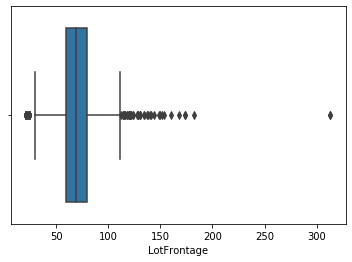

In [22]:
sns.boxplot(saad_col_.LotFrontage)

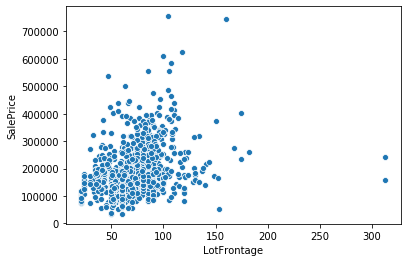

In [23]:
sns.scatterplot(saad_col_.LotFrontage, saad_col_.SalePrice)

#### We drop the outliers which over 300 to replace the nulls with mean

In [24]:
saad_col_.drop(saad_col_[saad_col_['LotFrontage'] > 300].index, axis=0, inplace=True)

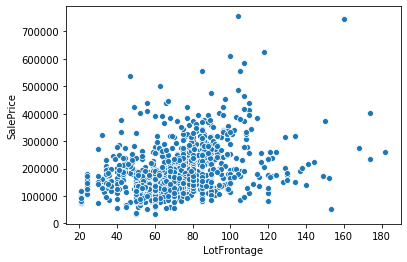

In [25]:
sns.scatterplot(saad_col_.LotFrontage, saad_col_.SalePrice)

In [26]:
saad_col_.corr()['SalePrice']

Id            -0.021950
LotFrontage    0.381130
LotArea        0.266865
OverallQual    0.793610
OverallCond   -0.078693
YearBuilt      0.523722
SalePrice      1.000000
Name: SalePrice, dtype: float64

#### We fill the missing values of LotFrontage by the mean after we remove the outliers

In [27]:

saad_col_.LotFrontage.fillna(np.mean(saad_col_.LotFrontage), inplace=True)

In [28]:
saad_col_.isna().sum()

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
LotShape        0
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
SalePrice       0
dtype: int64

We will not use this feature in modelling

In [29]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(10,10))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    ax.title.set_text('Features Correlation')
    b,t=plt.ylim()
    b  +=.5
    t -=.5
    plt.ylim(b,t)


    plt.show()

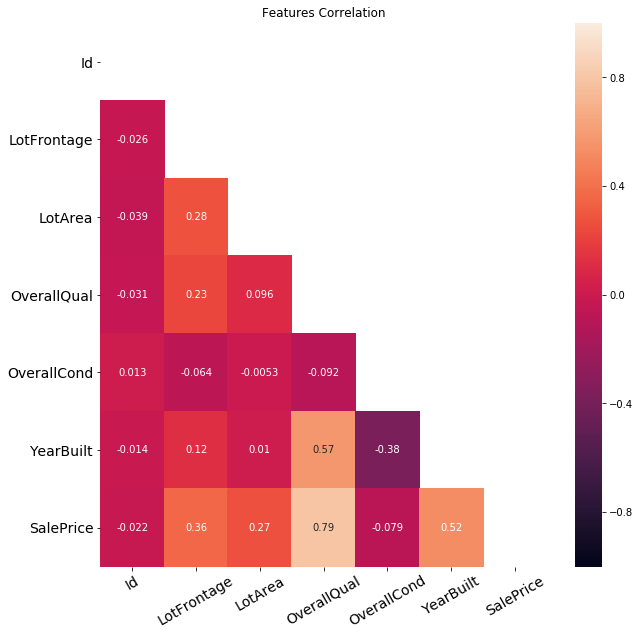

In [30]:
correlation_heat_map(saad_col_)

In [31]:
saad_col_.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,208500
1,2,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,181500
2,3,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,223500
3,4,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,140000
4,5,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,250000


In [32]:
saad_col_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 13 columns):
Id              1458 non-null int64
MSSubClass      1458 non-null object
LotFrontage     1458 non-null float64
LotArea         1458 non-null int64
LotShape        1458 non-null object
LotConfig       1458 non-null object
Neighborhood    1458 non-null object
BldgType        1458 non-null object
HouseStyle      1458 non-null object
OverallQual     1458 non-null int64
OverallCond     1458 non-null int64
YearBuilt       1458 non-null int64
SalePrice       1458 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 159.5+ KB


In [33]:
saad_col_.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.969822,69.644704,10468.471879,6.096022,5.574760,1971.250343,180893.652949
std,421.601941,20.113826,9879.455077,1.379962,1.112835,30.206855,79479.008386
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,34900.000000
25%,365.250000,60.000000,7544.500000,5.000000,5.000000,1954.000000,129925.000000
50%,729.500000,69.644704,9475.000000,6.000000,5.000000,1973.000000,163000.000000
75%,1094.750000,79.000000,11600.000000,7.000000,6.000000,2000.000000,214000.000000
max,1460.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,755000.000000


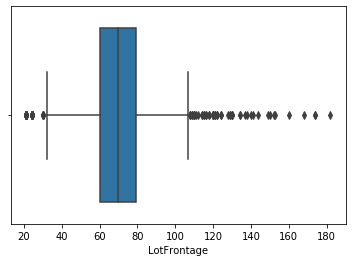

In [34]:
sns.boxplot(saad_col_.LotFrontage)

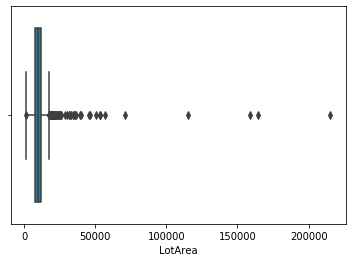

In [35]:
sns.boxplot(saad_col_.LotArea)

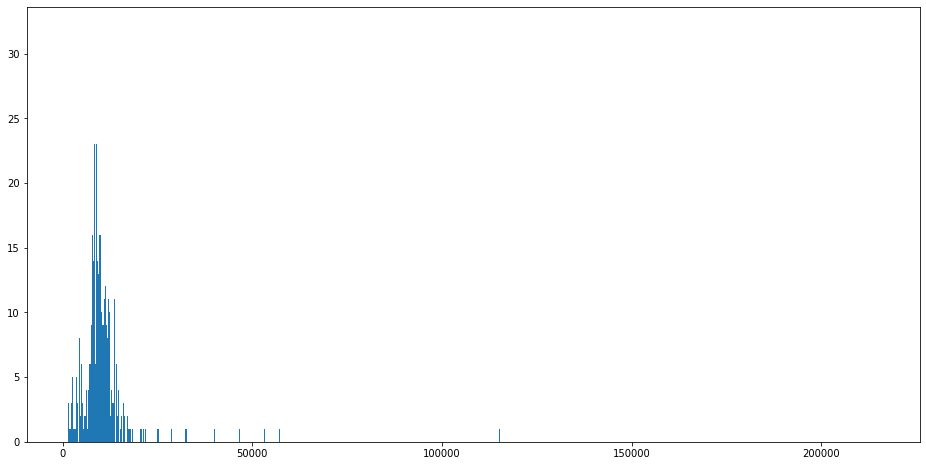

In [36]:
plt.figure(figsize=(16, 8))
plt.hist(saad_col_.LotArea, bins=3000);

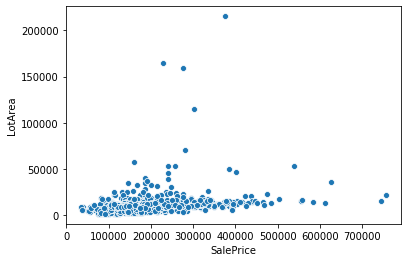

In [37]:
sns.scatterplot(saad_col_.SalePrice, saad_col_.LotArea)

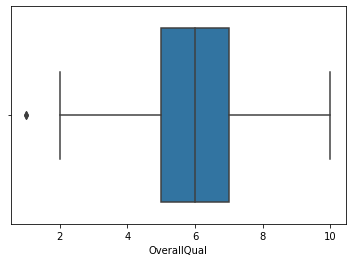

In [38]:
sns.boxplot(saad_col_.OverallQual)
# Categorical

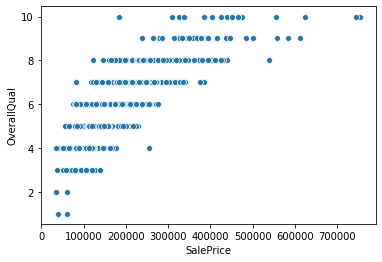

In [39]:
sns.scatterplot(saad_col_.SalePrice, saad_col_.OverallQual)
# OverallQual Ask Fahad about the number which represent the categoricals

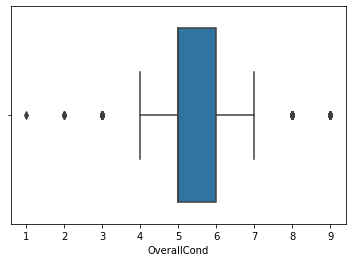

In [40]:
sns.boxplot(saad_col_.OverallCond)
# Categorical

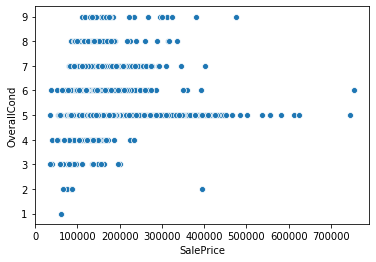

In [41]:
sns.scatterplot(saad_col_.SalePrice, saad_col_.OverallCond)

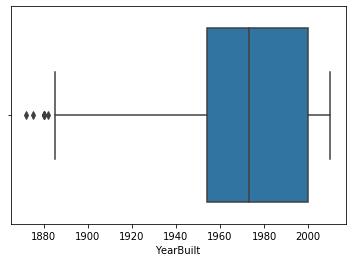

In [42]:
sns.boxplot(saad_col_.YearBuilt)

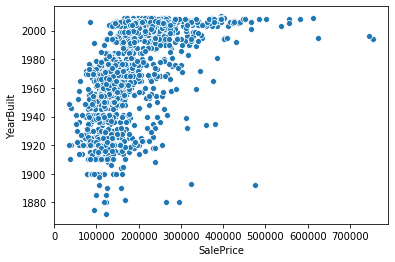

In [43]:
sns.scatterplot(saad_col_.SalePrice, saad_col_.YearBuilt)

In [44]:
saad_col_.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,208500
1,2,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,181500
2,3,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,223500
3,4,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,140000
4,5,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,250000


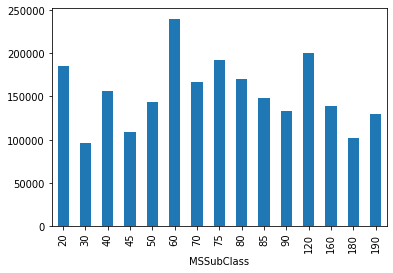

In [45]:
saad_col_.groupby('MSSubClass')['SalePrice'].mean().plot(kind='bar')

In [46]:
saad_col_.dtypes

Id                int64
MSSubClass       object
LotFrontage     float64
LotArea           int64
LotShape         object
LotConfig        object
Neighborhood     object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
SalePrice         int64
dtype: object

In [47]:
saad_col_.BldgType

0       1Fam
1       1Fam
2       1Fam
3       1Fam
4       1Fam
        ... 
1455    1Fam
1456    1Fam
1457    1Fam
1458    1Fam
1459    1Fam
Name: BldgType, Length: 1458, dtype: object

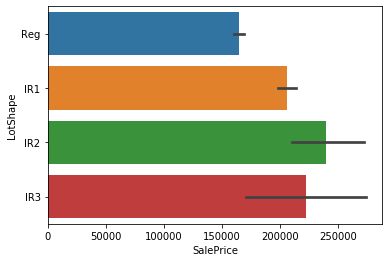

In [48]:
sns.barplot(saad_col_.SalePrice, saad_col_.LotShape)

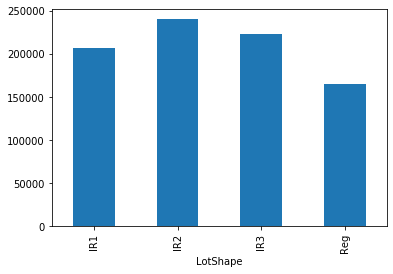

In [49]:
saad_col_.groupby('LotShape')['SalePrice'].mean().plot(kind='bar')

In [50]:
saad_col_[saad_col_['LotShape'] == 'Reg']

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,208500
1,2,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,181500
6,7,20,75.0,10084,Reg,Inside,Somerst,1Fam,1Story,8,5,2004,307000
8,9,50,51.0,6120,Reg,Inside,OldTown,1Fam,1.5Fin,7,5,1931,129900
9,10,190,50.0,7420,Reg,Corner,BrkSide,2fmCon,1.5Unf,5,6,1939,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,6,5,1999,175000
1456,1457,20,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,6,6,1978,210000
1457,1458,70,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,7,9,1941,266500
1458,1459,20,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,5,6,1950,142125


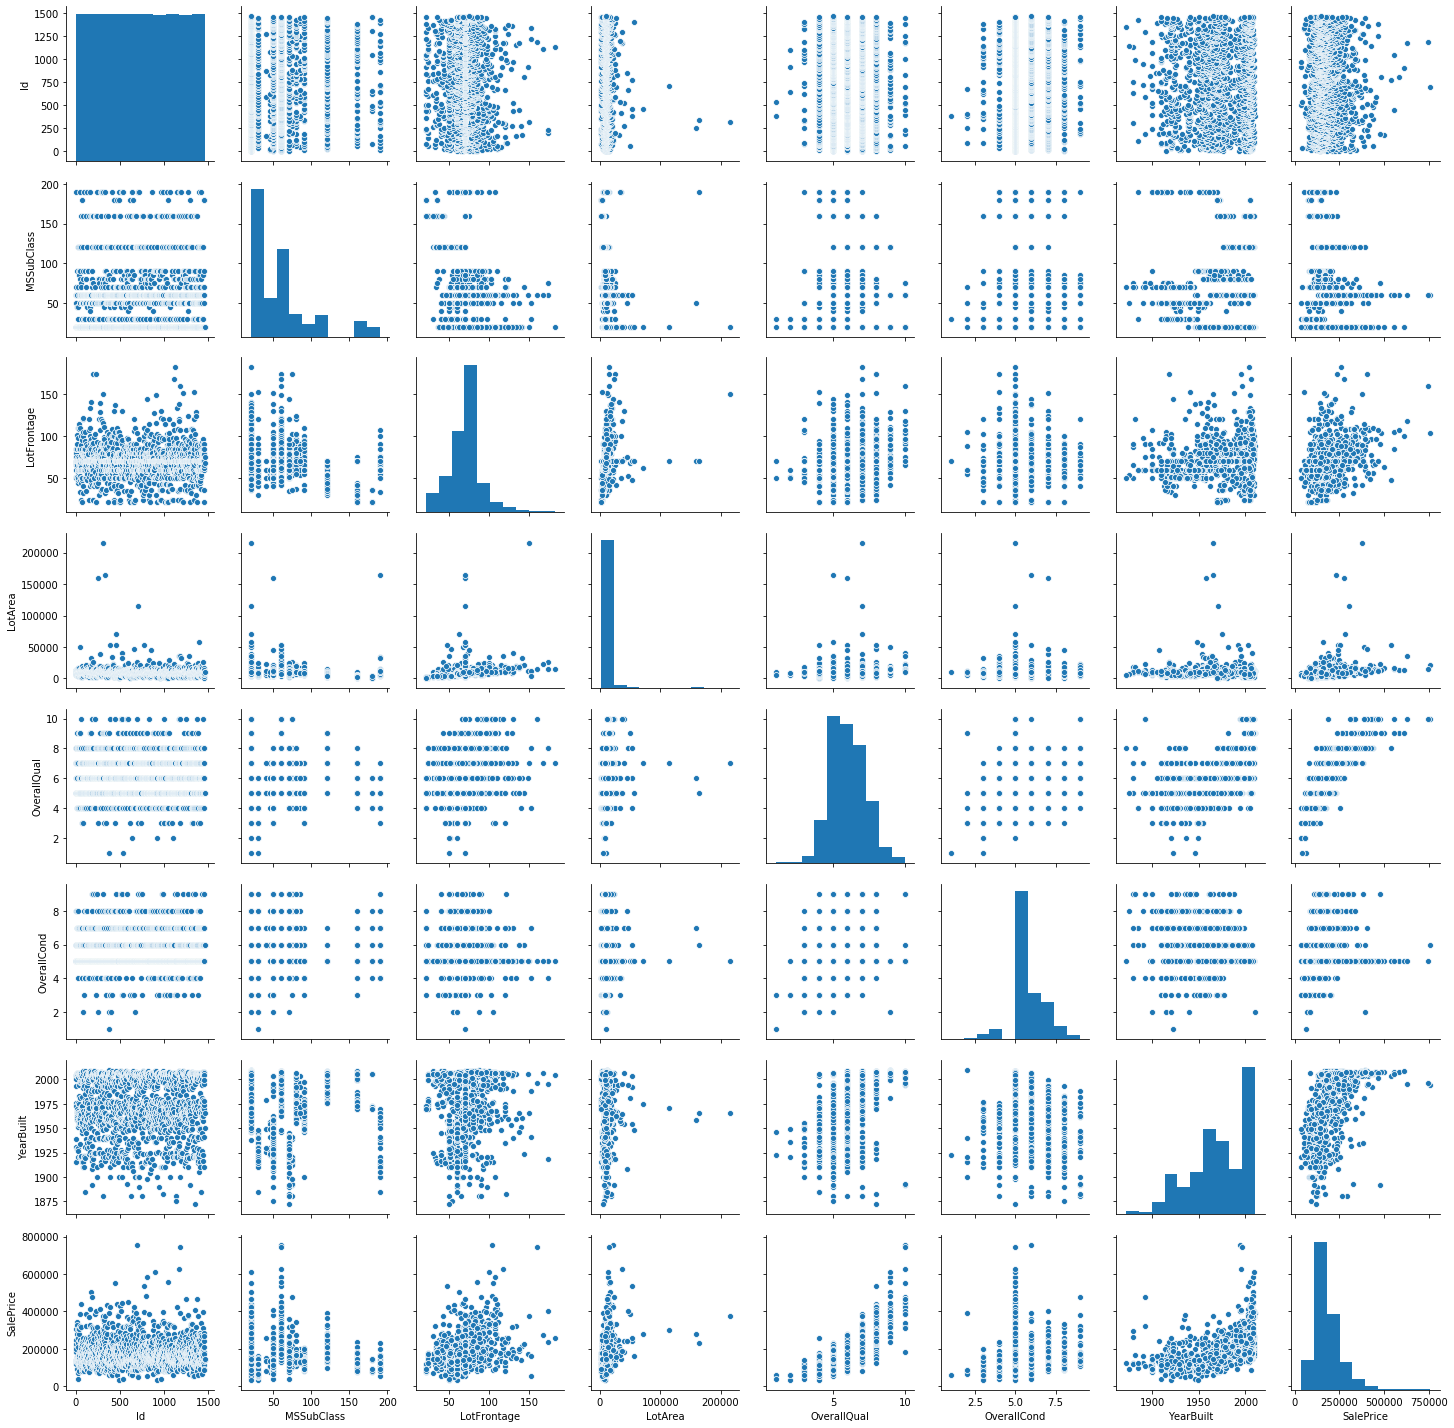

In [51]:
sns.pairplot(saad_col_)

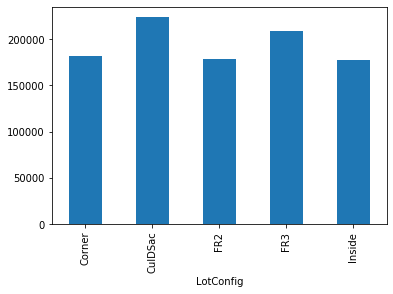

In [52]:
saad_col_.groupby('LotConfig')['SalePrice'].mean().plot(kind='bar')

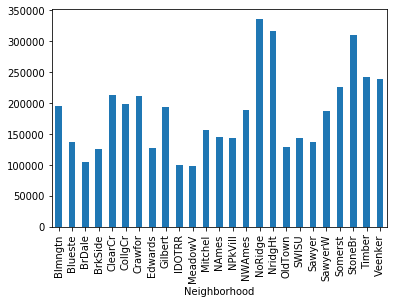

In [53]:
saad_col_.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')

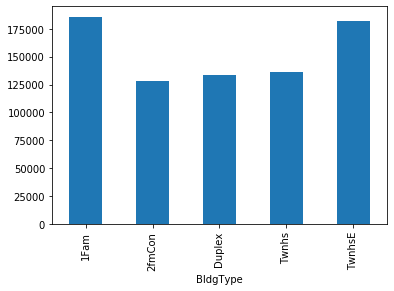

In [54]:

saad_col_.groupby('BldgType')['SalePrice'].mean().plot(kind='bar')

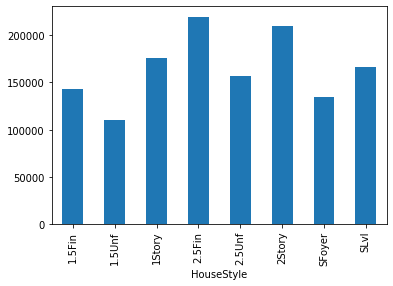

In [55]:
saad_col_.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')

In [56]:
dummyes = pd.get_dummies(saad_col_, drop_first=True)

In [57]:
dummyes.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,1,65.0,8450,7,5,2003,208500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,80.0,9600,6,8,1976,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,68.0,11250,7,5,2001,223500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,60.0,9550,7,5,1915,140000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,84.0,14260,8,5,2000,250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
dummyes.corr()['SalePrice']

Id                     -0.021950
LotFrontage             0.362814
LotArea                 0.266865
OverallQual             0.793610
OverallCond            -0.078693
YearBuilt               0.523722
SalePrice               1.000000
MSSubClass_30          -0.238625
MSSubClass_40          -0.016351
MSSubClass_45          -0.082900
MSSubClass_50          -0.156625
MSSubClass_60           0.378442
MSSubClass_70          -0.036821
MSSubClass_75           0.015305
MSSubClass_80          -0.028582
MSSubClass_85          -0.049107
MSSubClass_90          -0.114617
MSSubClass_120          0.063048
MSSubClass_160         -0.112997
MSSubClass_180         -0.082205
MSSubClass_190         -0.093550
LotShape_IR2            0.124479
LotShape_IR3            0.041036
LotShape_Reg           -0.267594
LotConfig_CulDSac       0.141947
LotConfig_FR2          -0.006797
LotConfig_FR3           0.018208
LotConfig_Inside       -0.081256
Neighborhood_Blueste   -0.020242
Neighborhood_BrDale    -0.101290
Neighborho

In [59]:
X = dummyes.drop('SalePrice', axis=1)

In [60]:
X
y = dummyes.SalePrice

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
lr = LinearRegression()
ss = StandardScaler()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
X_train_s = ss.fit_transform(X_train)

In [64]:
# X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

lr.fit(X_train_s, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
from sklearn.linear_model import LassoCV

In [66]:
# X_train_s = ss.transform(X_train)
# X_test_s = ss.transform(X_test)
lr = LassoCV()
lr.fit(X_train_s, y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [67]:
lr.score(X_train_s, y_train)

0.7563884216484162

In [68]:
lr.score(X_test_s, y_test)

0.7680980632973035

In [69]:
l

NameError: name 'l' is not defined

In [ ]:
X.head()